## Fake News Classification
Proyek ini bertujuan untuk mengklasifikasikan berita sebagai 'Hoax' atau 'Asli' menggunakan model Machine Learning.

### 1. Import Library
Kita mulai dengan mengimpor library yang dibutuhkan.

### 2. Load Dataset
Memuat dataset dan melihat beberapa sampel data untuk memahami strukturnya.

### 3. Data Preprocessing
Melakukan preprocessing seperti menghapus stopwords, stemming, tokenization, dll.

### 4. Exploratory Data Analysis (EDA)
Melihat distribusi data, jumlah kata per berita, serta word cloud.

### 5. Model Training
Beberapa model Machine Learning seperti Logistic Regression dan Naïve Bayes diuji untuk melihat performanya.

### 6. Evaluasi Model
Menggunakan metrik seperti accuracy, precision, recall, dan confusion matrix.

### 7. Prediksi Interaktif
Menambahkan fitur untuk memasukkan teks berita dan model akan memprediksi apakah berita tersebut asli atau hoaks.

## Fake News Classification
Proyek ini bertujuan untuk mengklasifikasikan berita sebagai 'Hoax' atau 'Asli' menggunakan model Machine Learning. Dataset yang digunakan akan melalui proses preprocessing, eksplorasi, pelatihan model, dan evaluasi.

### 1. Import Library
Kita mulai dengan mengimpor library yang dibutuhkan.

### 2. Load Dataset
Memuat dataset dan melihat beberapa sampel data untuk memahami strukturnya.

### 3. Data Preprocessing
Melakukan preprocessing seperti menghapus stopwords, stemming, tokenization, dll.

### 4. Exploratory Data Analysis (EDA)
Kita akan melihat distribusi data, jumlah kata per berita, serta visualisasi word cloud dari berita palsu dan asli.

### 5. Model Training
Beberapa model Machine Learning seperti Logistic Regression dan Naïve Bayes akan diuji untuk melihat performanya dalam mendeteksi berita palsu.

### 6. Evaluasi Model
Menggunakan metrik seperti accuracy, precision, recall, dan confusion matrix untuk menilai performa model.

### 7. Prediksi Interaktif
Menambahkan fitur di mana pengguna bisa memasukkan teks berita dan model akan memprediksi apakah berita tersebut asli atau hoaks.

In [1]:
#Impor Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#Impor Dataset
from sklearn.datasets import load_iris

In [3]:
data=load_iris()
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df['target']=data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Tidak terdapat missing data

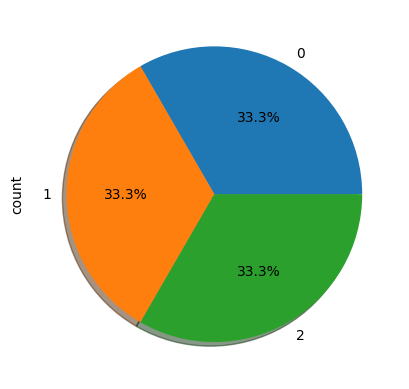

In [5]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

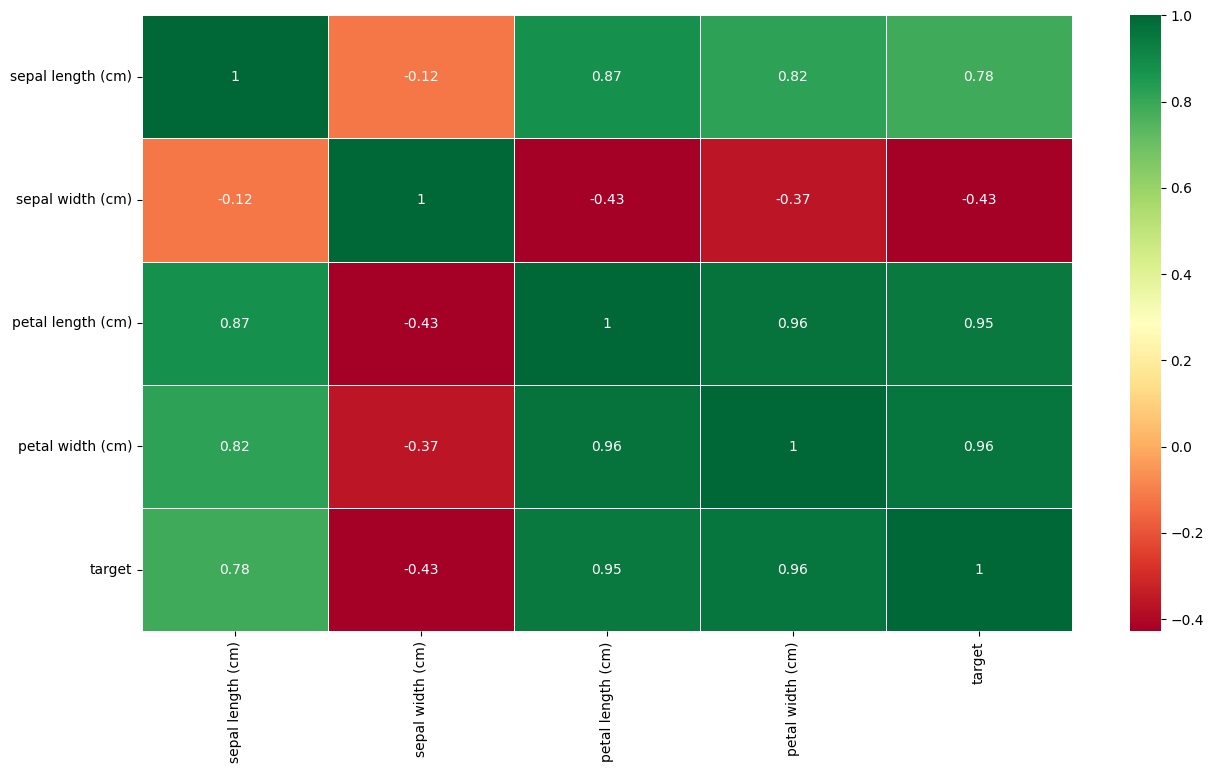

In [6]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [7]:
korelasi = df.corr()["target"].sort_values()
korelasi

,target
sepal width (cm),-0.426658
sepal length (cm),0.782561
petal length (cm),0.949035
petal width (cm),0.956547
target,1.000000


In [8]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  105
y Train :  105
X Test :  45
t Test :  45


In [9]:
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
X_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_pred,y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9714285714285714


In [11]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [12]:
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  1.0


In [13]:
#Model validation
#Kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X_train, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.933
